# **K-Means SPOTIFY**

Dataset previamente filtrado, usado para proyecto de PySpark, posteriormente se realizaron taréas relacionadas al dataset utilizado para el modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Dropbox/CursoSpark/df_spotify.csv', sep= ',')

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'artists', 'album_name',
       'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'genero'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [5]:
df = df.drop('track_id', axis=1)

In [6]:
df['explicit'] = [0 if x == False
                  else 1 for x in df['explicit']]

In [7]:
df.head(5)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genero
0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


In [8]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [9]:
df[df['track_name'] == 'Presión']

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genero
2638,Callejeros,Presión,Presión,47,238346,0,0.414,0.938,10,-4.592,0,0.0684,0.0602,0.000001,0.11,0.643,99.014,4,alt-rock,2
3982,Callejeros,Presión,Presión,47,238346,0,0.414,0.938,10,-4.592,0,0.0684,0.0602,0.000001,0.11,0.643,99.014,4,alternative,3


In [10]:
df_modelo = df.drop(['artists', 'album_name', 'track_genre'], axis=1)

In [11]:
df_modelo.dtypes

track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genero                int64
dtype: object

In [12]:
df_modelo.tail(5)

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
113995,Sleep My Little Boy,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,113
113996,Water Into Light,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,113
113997,Miss Perfumado,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,113
113998,Friends,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,113
113999,Barbincor,22,241826,0,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,113


In [13]:
#BORRAMOS LAS PISTAS CON TEMPO 0.0 DESCRIPTA EN LA PARTE FINAL DEL ANÁLISIS BIVARIADO
df_modelo = df_modelo[df_modelo['tempo'] != 0.0]

In [14]:
df_modelo.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
count,113843.000000,1.138430e+05,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000,113843.000000
mean,33.233075,2.281067e+05,0.085618,0.567582,0.642098,5.309224,-8.239883,0.637483,0.084769,0.314659,0.155368,0.213220,0.474722,122.316290,3.909419,56.445174
std,22.316197,1.063079e+05,0.279800,0.172380,0.250793,3.559407,4.993644,0.480729,0.105758,0.332339,0.308892,0.189929,0.258841,29.653447,0.407885,32.891040
min,0.000000,0.000000e+00,0.000000,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000,0.000000
25%,17.000000,1.741980e+05,0.000000,0.456000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.430000,4.000000,28.000000
50%,34.000000,2.130000e+05,0.000000,0.580000,0.685000,5.000000,-6.998000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000,56.000000
75%,50.000000,2.615790e+05,0.000000,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047700,0.273000,0.683000,140.077500,4.000000,85.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


## ANÁLISIS UNIVARIADO

POPULARIDAD

In [15]:
popularidad = df_modelo['popularity']

In [16]:
popularidad

0         73
1         55
2         57
3         71
4         82
          ..
113995    21
113996    22
113997    22
113998    41
113999    22
Name: popularity, Length: 113843, dtype: int64

C:\Users\nicos\AppData\Local\Temp\ipykernel_1212\677600406.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(popularidad, shade=True)


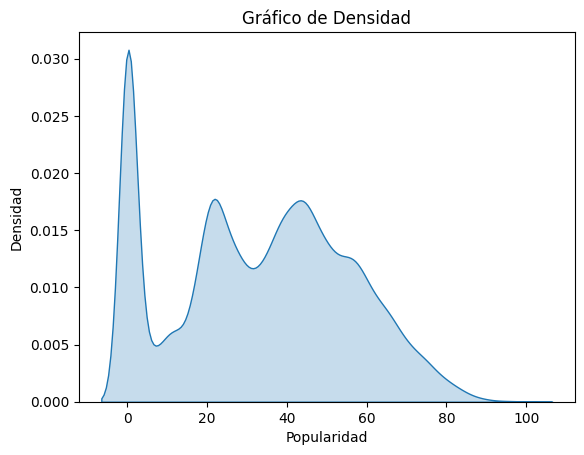

In [17]:
sns.kdeplot(popularidad, shade=True)
plt.title('Gráfico de Densidad')
plt.xlabel('Popularidad')
plt.ylabel('Densidad')
plt.show()

In [18]:
popularidad.describe()

count    113843.000000
mean         33.233075
std          22.316197
min           0.000000
25%          17.000000
50%          34.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

In [19]:
popularidad_values = popularidad.values

In [20]:
popularidad_values = list(popularidad_values)

In [21]:
suma = 0
for i in popularidad_values:
    suma +=i

promedio = (suma / 114000)

In [22]:
promedio

33.18730701754386

In [23]:
ranges = ['0', '50', '100']

In [24]:
count_popularidad = [popularidad_values.count(0), popularidad_values.count(50), popularidad_values.count(100)]

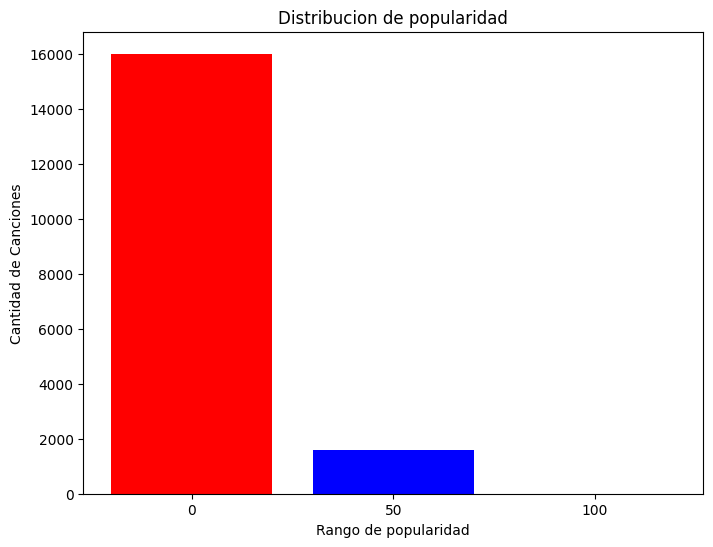

In [25]:
plt.figure(figsize=(8,6))
plt.bar(ranges, count_popularidad, color= ['red', 'blue', 'green'])
plt.xlabel('Rango de popularidad')
plt.ylabel('Cantidad de Canciones')
plt.title('Distribucion de popularidad')
plt.show()

***Lo que podemos saber de este análisis sobre la popularidad es son más las pistas poco populares que más populares. Quizas se deba a la continua actualización y lanzamientos de hits nuevos.***

DURATION-MS

Duracion de una pista en milisegundos

In [26]:
duracion_ms = df_modelo['duration_ms']

In [27]:
duracion_ms.describe()

count    1.138430e+05
mean     2.281067e+05
std      1.063079e+05
min      0.000000e+00
25%      1.741980e+05
50%      2.130000e+05
75%      2.615790e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

In [28]:
duracion_ms.unique()

array([230666, 149610, 210826, ..., 250629, 312566, 271466], dtype=int64)

In [29]:
duracion_ms_values = list(duracion_ms.values)

In [30]:
duracion_ms_values

[230666,
 149610,
 210826,
 201933,
 198853,
 214240,
 229400,
 242946,
 189613,
 205594,
 244800,
 240165,
 198712,
 248448,
 188133,
 244986,
 129750,
 169728,
 189613,
 260186,
 242946,
 174174,
 229400,
 216386,
 231266,
 302346,
 131760,
 273653,
 131760,
 131760,
 131760,
 131760,
 234186,
 259558,
 259558,
 259558,
 257493,
 247791,
 206267,
 257493,
 306794,
 266960,
 230098,
 230098,
 193943,
 230098,
 230098,
 230098,
 230098,
 230098,
 213098,
 232360,
 241119,
 220239,
 171543,
 286865,
 234473,
 216000,
 232760,
 178600,
 254400,
 244320,
 124933,
 222146,
 181852,
 186584,
 159600,
 250266,
 318908,
 222351,
 219480,
 221693,
 354400,
 177500,
 247840,
 216386,
 229320,
 330933,
 172213,
 226106,
 235173,
 195213,
 236306,
 181400,
 181400,
 164500,
 220573,
 257493,
 257493,
 210612,
 154440,
 154440,
 263866,
 154440,
 154440,
 154440,
 154440,
 154440,
 177613,
 199040,
 293040,
 138495,
 198626,
 292566,
 199019,
 181760,
 349920,
 204973,
 322146,
 210375,
 131000,
 

C:\Users\nicos\AppData\Local\Temp\ipykernel_1212\3528134794.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(duracion_ms, shade=True)


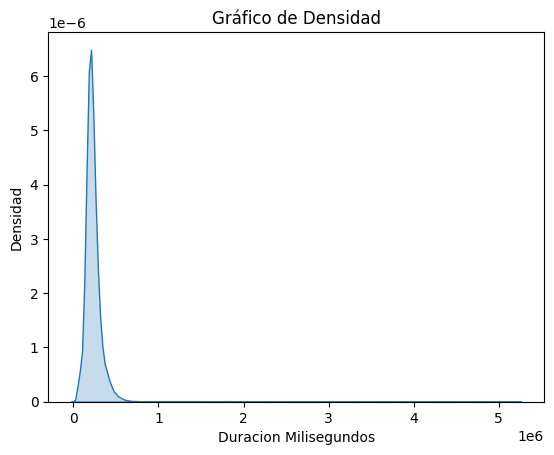

In [31]:
#GRAFICO SIN NORMALIZACION, PODEMOS OBSERVAR QUE EL GRAFICO NO NOS DICE MUCHO.
sns.kdeplot(duracion_ms, shade=True)
plt.title('Gráfico de Densidad')
plt.xlabel('Duracion Milisegundos')
plt.ylabel('Densidad')
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
min_max_scaler = MinMaxScaler()
duration_ms_normalized = min_max_scaler.fit_transform(np.array(duracion_ms).reshape(-1, 1))

# Estandarización
standard_scaler = StandardScaler()
duration_ms_standardized = standard_scaler.fit_transform(np.array(duracion_ms).reshape(-1, 1))

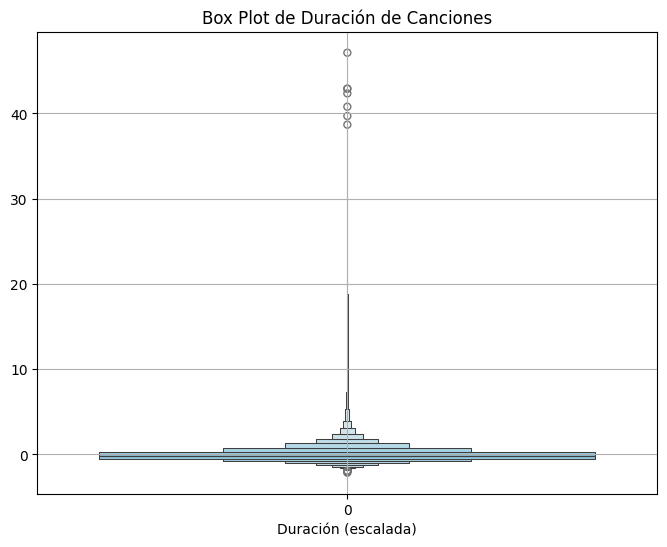

In [34]:
#HAY QUE ANALIZAR LAS CANCIONES CON POCA DURACION O CON DURACION 0.
plt.figure(figsize=(8, 6))
sns.boxenplot(duration_ms_standardized, color='skyblue')
plt.xlabel('Duración (escalada)')
plt.title('Box Plot de Duración de Canciones')
plt.grid(True)
plt.show()

In [35]:
def ms_a_minutos(duracion_ms):
    minutos = []
    for ms in duracion_ms:
        minutos.append(ms/60000)
    return minutos


In [36]:
minutos = ms_a_minutos(duracion_ms)

In [37]:
minutos

[3.8444333333333334,
 2.4935,
 3.5137666666666667,
 3.36555,
 3.314216666666667,
 3.570666666666667,
 3.8233333333333333,
 4.0491,
 3.1602166666666665,
 3.4265666666666665,
 4.08,
 4.00275,
 3.3118666666666665,
 4.1408,
 3.13555,
 4.0831,
 2.1625,
 2.8288,
 3.1602166666666665,
 4.336433333333333,
 4.0491,
 2.9029,
 3.8233333333333333,
 3.6064333333333334,
 3.854433333333333,
 5.0391,
 2.196,
 4.560883333333333,
 2.196,
 2.196,
 2.196,
 2.196,
 3.9031,
 4.325966666666667,
 4.325966666666667,
 4.325966666666667,
 4.29155,
 4.12985,
 3.4377833333333334,
 4.29155,
 5.1132333333333335,
 4.449333333333334,
 3.834966666666667,
 3.834966666666667,
 3.2323833333333334,
 3.834966666666667,
 3.834966666666667,
 3.834966666666667,
 3.834966666666667,
 3.834966666666667,
 3.551633333333333,
 3.8726666666666665,
 4.01865,
 3.67065,
 2.85905,
 4.781083333333333,
 3.9078833333333334,
 3.6,
 3.8793333333333333,
 2.9766666666666666,
 4.24,
 4.072,
 2.0822166666666666,
 3.7024333333333335,
 3.03086666666

In [38]:
serie_minutos = pd.Series(minutos)

In [39]:
serie_minutos.sort_values(ascending=True)

65888     0.000000
59765     0.263333
16853     0.290883
16285     0.297100
39230     0.297100
           ...    
73828    76.064950
24345    78.838367
10981    79.817100
10932    79.817100
73605    87.288250
Length: 113843, dtype: float64

In [40]:
df_modelo[df_modelo['duration_ms'] == 8586].T

""
track_name
popularity
duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness


In [41]:
df_modelo['duration_ms'].sort_values(ascending=True)

65900          0
59775      15800
16856      17453
16288      17826
39233      17826
          ...   
73840    4563897
24348    4730302
10984    4789026
10935    4789026
73617    5237295
Name: duration_ms, Length: 113843, dtype: int64

In [42]:
df_modelo = df_modelo[df_modelo['duration_ms'] != 0]

In [43]:
df_modelo['duration_ms'].sort_values(ascending=True)

59775      15800
16856      17453
16288      17826
39233      17826
59306      21120
          ...   
73840    4563897
24348    4730302
10984    4789026
10935    4789026
73617    5237295
Name: duration_ms, Length: 113842, dtype: int64

***La mayor cantidad de pistas duran menos, se entiende segun la documentacion que son pistas musicales, aunque los valores "atipicos" serian los podcasts, que tienen duracion de mas de dos horas.***

EXPLICIT

Estamos hablando si una pista es de condenido explicito o no. 0 y 1.

In [44]:
df_modelo['explicit'].describe()

count    113842.000000
mean          0.085619
std           0.279801
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: explicit, dtype: float64

In [45]:
df_modelo['explicit'].unique()

array([0, 1], dtype=int64)

C:\Users\nicos\AppData\Local\Temp\ipykernel_1212\1876329400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts, palette=colors)


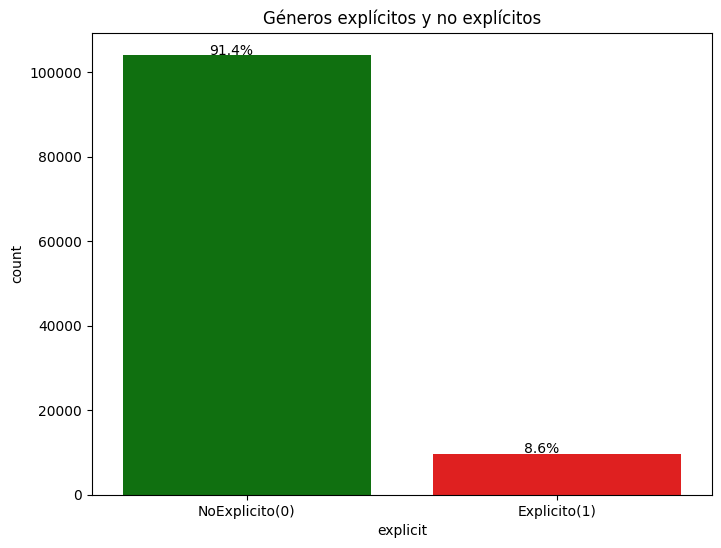

In [46]:
explicito = df_modelo['explicit']
counts = explicito.value_counts()
colors = ['green', 'red']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=counts.index, y=counts, palette=colors)
plt.xticks(ticks=[0, 1], labels=["NoExplicito(0)", "Explicito(1)"])
plt.title("Géneros explícitos y no explícitos")

# Agregar porcentajes a cada barra
total = len(explicito)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height() / total)
    x = i.get_x() + i.get_width() / 2 - 0.05
    y = i.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

In [47]:
counts

explicit
0    104095
1      9747
Name: count, dtype: int64

***Son pocas las pistas que tienen contenido explicito en comparacion a las que no lo tienen***

DANCEABILITY

La bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 es el más bailable.

In [48]:
df_modelo['danceability'].describe()

count    113842.000000
mean          0.567582
std           0.172380
min           0.051300
25%           0.456000
50%           0.580000
75%           0.695000
max           0.985000
Name: danceability, dtype: float64

C:\Users\nicos\AppData\Local\Temp\ipykernel_1212\3700429655.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_modelo['danceability'], shade=True)


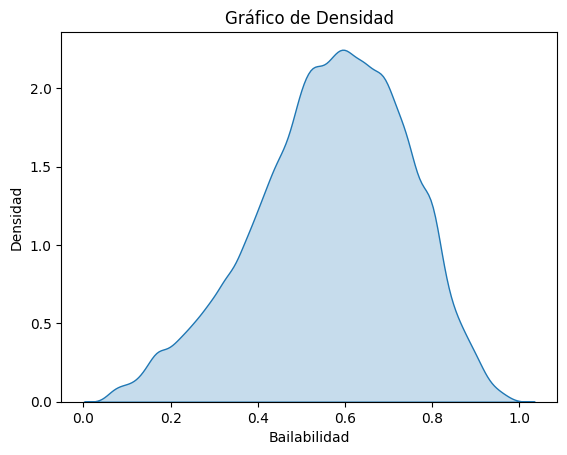

In [49]:
sns.kdeplot(df_modelo['danceability'], shade=True)
plt.title('Gráfico de Densidad')
plt.xlabel('Bailabilidad')
plt.ylabel('Densidad')
plt.show()

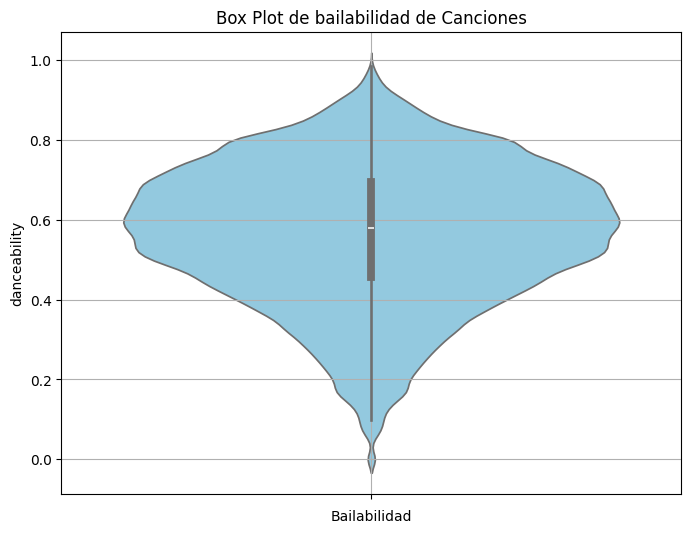

In [50]:
plt.figure(figsize=(8, 6))
sns.violinplot(df['danceability'], color='skyblue')
plt.xlabel('Bailabilidad')
plt.title('Box Plot de bailabilidad de Canciones')
plt.grid(True)
plt.show()

***Hay una distribucion bastante estable, aunque el promedio se encuentra dentro de las pistas que son mas bailables por asi decirlo, quizas el termino adecuado seria mas animado.***

ENERGY

La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Normalmente, las pistas enérgicas se sienten rápidas, ruidosas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach obtiene una puntuación baja en la escala. Las características de percepción que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, velocidad de inicio y entropía general.

In [51]:
df_modelo['energy'].describe()

count    113842.000000
mean          0.642098
std           0.250794
min           0.000020
25%           0.473000
50%           0.685000
75%           0.854000
max           1.000000
Name: energy, dtype: float64

<Axes: xlabel='energy', ylabel='Count'>

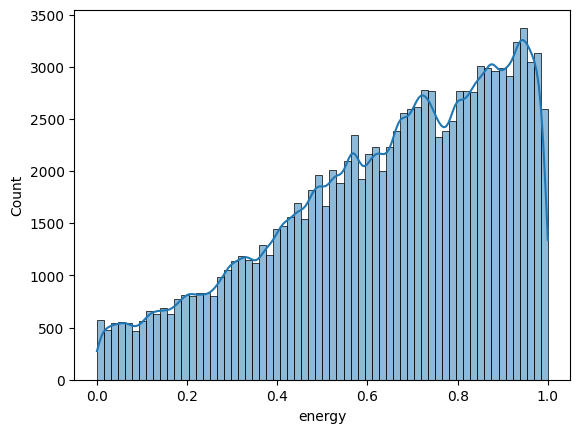

In [52]:
sns.histplot(df_modelo['energy'], kde = True,
             kde_kws = {'bw_adjust': 0.5})

In [53]:
df_modelo[df_modelo['energy'] == 0.0]

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero


***La distribucion de la muestra de pistas tienen una tendencia a ser pistas mas energicas o ruidosas.***

KEY

La clave en la que se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de clase de tono . Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se detectó ninguna clave, el valor es -1.

In [54]:
df_modelo['key'].describe()

count    113842.000000
mean          5.309209
std           3.559419
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          11.000000
Name: key, dtype: float64

In [55]:
df_modelo['key'].unique()

array([ 1,  0,  2,  6, 11,  8,  4,  7,  3, 10,  5,  9], dtype=int64)

In [56]:
grupo0 = df_modelo['key'].value_counts(0)

In [57]:
grupo0.sort_values(ascending=False)

key
7     13236
0     13045
2     11625
9     11303
1     10743
5      9362
11     9273
4      9004
6      7914
10     7425
8      7348
3      3564
Name: count, dtype: int64

In [58]:
grupo0.values

array([13236, 13045, 11625, 11303, 10743,  9362,  9273,  9004,  7914,
        7425,  7348,  3564], dtype=int64)

C:\Users\nicos\AppData\Local\Temp\ipykernel_1212\3252337732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = grupo0.keys(), y = grupo0.values, linewidth = 0.5, palette = "pastel", dodge = True,)


<Axes: xlabel='key'>

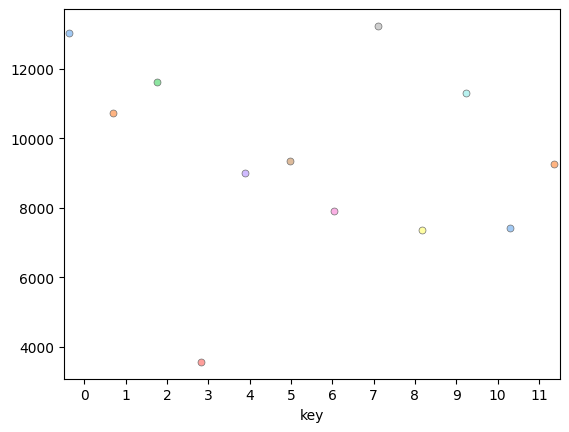

In [59]:
sns.swarmplot(x = grupo0.keys(), y = grupo0.values, linewidth = 0.5, palette = "pastel", dodge = True,)

***No entiendo bien esta variable, pero parece, según la descripción, una variable que sirve para agrupar por por clave. Veremos si funciona dentro de nuestro modelo.***

LOUDNESS

El volumen general de una pista en decibeles (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.

In [60]:
df_modelo['loudness'].describe()

count    113842.000000
mean         -8.239872
std           4.993665
min         -46.591000
25%         -10.002000
50%          -6.998000
75%          -5.000000
max           4.532000
Name: loudness, dtype: float64

<Axes: xlabel='loudness', ylabel='Count'>

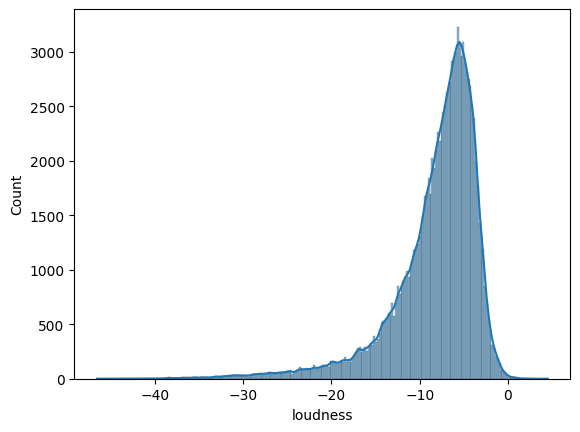

In [61]:
x = df_modelo['loudness']
df_loudness = {'loudness': x}

# Histograma
sns.histplot(x = x, kde = True,
             kde_kws = {'bw_adjust': 0.5})

***Las pistas que tienen menor volumen son pistas relacionadas a la meditacion y demas.***

MODE

Modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. El mayor está representado por 1 y el menor es 0.

In [62]:
df_modelo['mode'].describe()

count    113842.000000
mean          0.637489
std           0.480727
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: mode, dtype: float64

C:\Users\nicos\AppData\Local\Temp\ipykernel_1212\150667354.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= counts1.index, y=counts1, palette=colors)


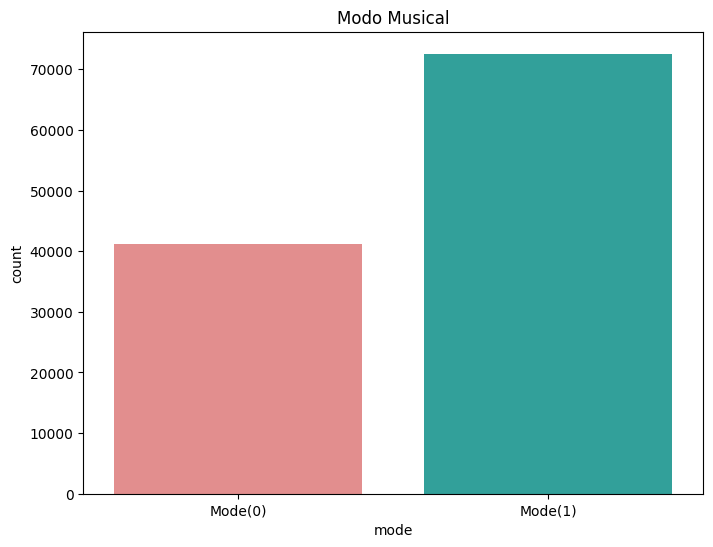

In [63]:
mode = df_modelo['mode']
counts1 = mode.value_counts()
colors = ["lightcoral", "lightseagreen"]

plt.figure(figsize= (8,6))
sns.barplot(x= counts1.index, y=counts1, palette=colors)
plt.xticks(ticks= [0, 1], labels=["Mode(0)", "Mode(1)"])
plt.title("Modo Musical")
plt.show()

In [64]:
counts1

mode
1    72573
0    41269
Name: count, dtype: int64

***El mayor porcentaje de pistas tiene mas contenido melodico.***

SPEECHINESS

Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener música y voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores inferiores a 0,33 probablemente representen música y otras pistas que no sean de voz.

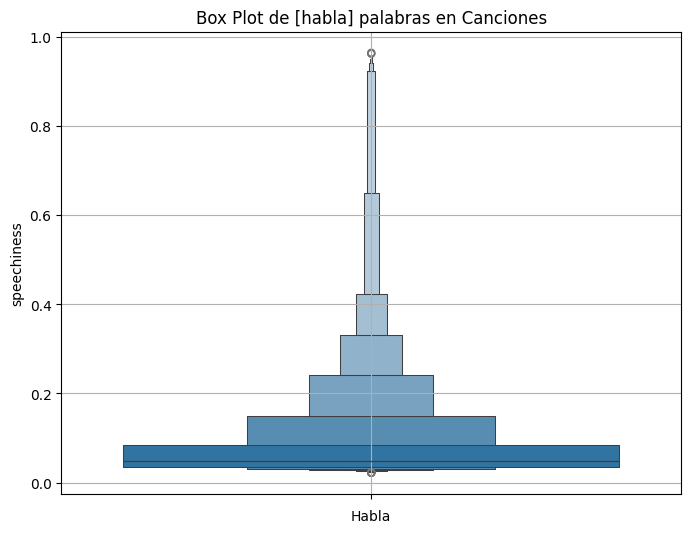

In [65]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df_modelo['speechiness'])
plt.xlabel('Habla')
plt.title('Box Plot de [habla] palabras en Canciones')
plt.grid(True)
plt.show()

***Podemos encontrar un dato interesante y es que el mayor porcentaje de pistas no necesariamente tienen que tener voz de por medio, quizas una gran parte puedan ser pistas sin voz.***

ACOUSTICNESS

Una medida de confianza de 0,0 a 1,0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.

In [66]:
df_modelo['acousticness'].describe()

count    113842.000000
mean          0.314656
std           0.332338
min           0.000000
25%           0.016900
50%           0.168000
75%           0.597000
max           0.996000
Name: acousticness, dtype: float64

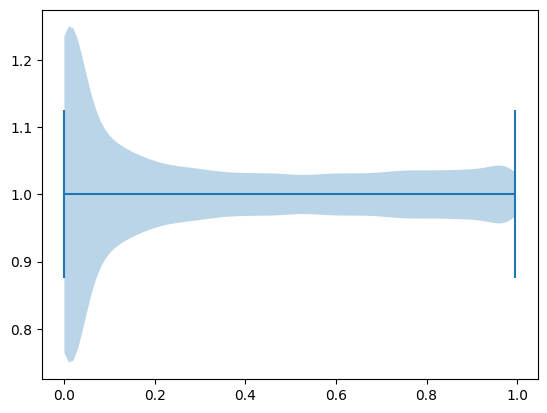

In [67]:
fig, ax = plt.subplots()
ax.violinplot(df_modelo['acousticness'], vert = False)
plt.show()

***Gran parte de la muestra no es acustica***

INSTRUMENTALNESS

Predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 pretenden representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

In [68]:
df_modelo['instrumentalness'].describe()

count    113842.000000
mean          0.155369
std           0.308893
min           0.000000
25%           0.000000
50%           0.000041
75%           0.047700
max           1.000000
Name: instrumentalness, dtype: float64

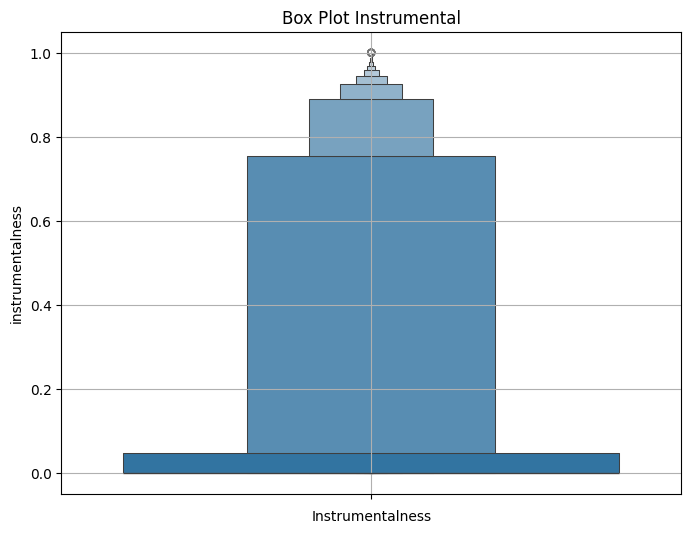

In [69]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df_modelo['instrumentalness'])
plt.xlabel('Instrumentalness')
plt.title('Box Plot Instrumental')
plt.grid(True)
plt.show()

***Podemos ver un gran volumen de la muestra acercandose al valor 0, mientras mas se acerque a ese valor, hay mas probabilidad que estemos frente a una pista con mas contenido vocal que instrumental.***

LIVENESS

Detecta la presencia de una audiencia en la grabación. Los valores de liveness más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.

In [70]:
df_modelo['liveness'].describe()

count    113842.000000
mean          0.213221
std           0.189929
min           0.009250
25%           0.098000
50%           0.132000
75%           0.273000
max           1.000000
Name: liveness, dtype: float64

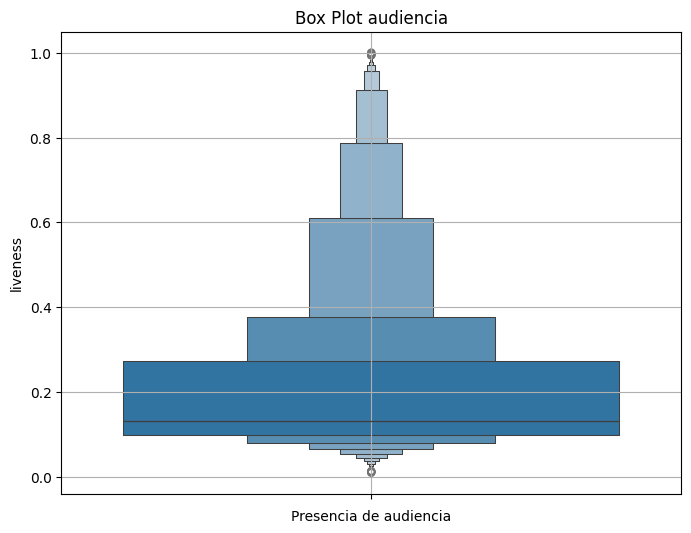

In [71]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df_modelo['liveness'])
plt.xlabel('Presencia de audiencia')
plt.title('Box Plot audiencia')
plt.grid(True)
plt.show()

***La mayor cantidad de pistas son las que no tienen audiencia de fondo, y pocas pistas son las que estan "activas" o grabadas con audiencia de fondo.***

VALENCE


Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

In [72]:
df_modelo['valence'].describe()

count    113842.000000
mean          0.474720
std           0.258841
min           0.000000
25%           0.261000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

<Axes: xlabel='valence', ylabel='Count'>

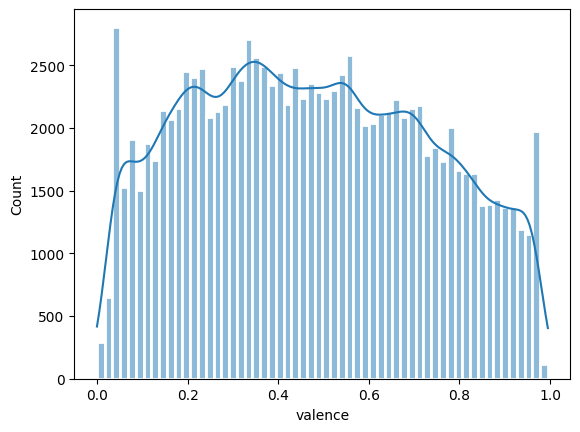

In [73]:
sns.histplot(x = df_modelo['valence'],
             edgecolor = "white",
             linewidth = 2, kde=True)

***Es la variable con distribucion mas uniforme que se encuentra en la fuente de datos, pero la pequeña tendecia cede ante las pistas que tienen un contenido deprimido, triste o enojado.***

TEMPO

El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración promedio del tiempo.

In [74]:
df_modelo['tempo'].describe()

count    113842.000000
mean        122.316149
std          29.653539
min          30.200000
25%          99.429500
50%         122.023000
75%         140.077750
max         243.372000
Name: tempo, dtype: float64

In [75]:
df_modelo[df_modelo['tempo'] == 0.0]

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero


<Axes: xlabel='tempo', ylabel='Count'>

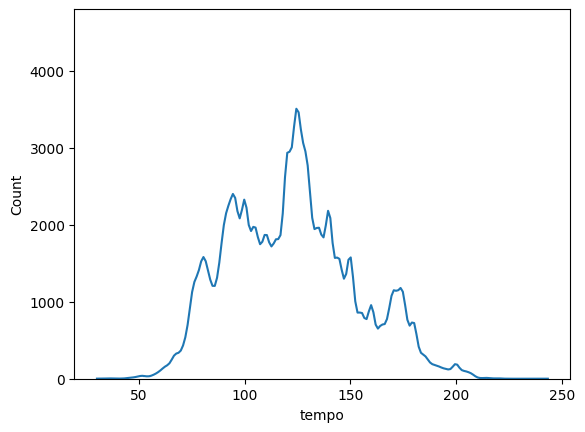

In [76]:
sns.histplot(x = df_modelo['tempo'],
             edgecolor = "white",
             linewidth = 3, kde=True, kde_kws = {'bw_adjust': 0.5})

***Es la segunda variable con una distribucion uniforme, con la diferencia que tenemos mas minimos y mas maximos dentro de la misma.***

TIME SIGNATURE

Un compás estimado. El tipo de compás (metro) es una convención de notación para especificar cuántos tiempos hay en cada compás (o compás). El tipo de compás varía de 3 a 7, lo que indica tipos de compás de "3/4" a "7/4".

In [77]:
df_modelo['time_signature'].describe()

count    113842.000000
mean          3.909418
std           0.407887
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: time_signature, dtype: float64

In [78]:
df_modelo['time_signature'].unique()

array([4, 3, 1, 5, 0], dtype=int64)

In [79]:
time_signature = df_modelo['time_signature'].value_counts()

In [80]:
time_signature

time_signature
4    101842
3      9195
5      1826
1       973
0         6
Name: count, dtype: int64

In [81]:
time_signature_values = time_signature.values

In [82]:
time_signature_keys = time_signature.keys()

In [83]:
time_signature_keys

Index([4, 3, 5, 1, 0], dtype='int64', name='time_signature')

In [84]:
time_signature_values

array([101842,   9195,   1826,    973,      6], dtype=int64)

<Axes: xlabel='time_signature', ylabel='Count'>

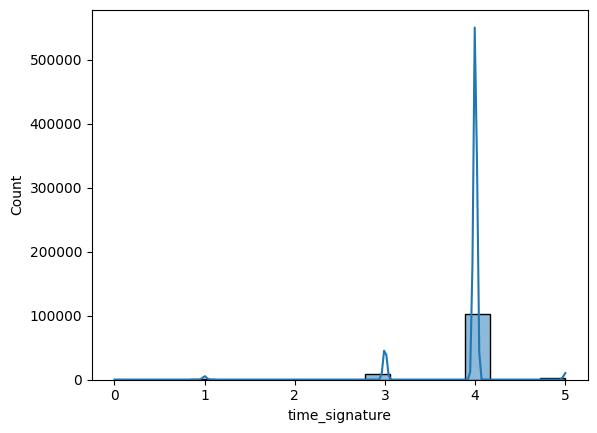

In [85]:
sns.histplot(df_modelo['time_signature'], kde = True,
             kde_kws = {'bw_adjust': 0.5})

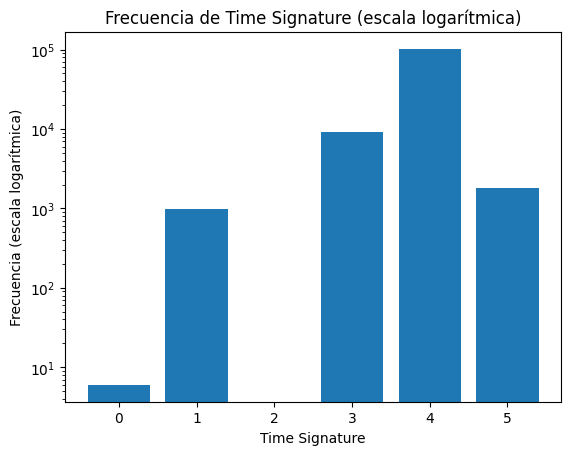

In [86]:
plt.bar(list(time_signature_keys), list(time_signature_values))
plt.yscale('log')
plt.xlabel('Time Signature')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.title('Frecuencia de Time Signature (escala logarítmica)')
plt.show()

***Variable quizas mas conocida y apreciable para el campo musical, veremos si tiene relevancia en nuestro modelo.***

GENERO

Pasamos los genermos a musicales, en total 114 generos.

In [87]:
df_modelo['genero'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  57,  56,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  81,  80,  82,  83,  84,  86,  85,  87,  88,  89,  91,
        90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113], dtype=int64)

In [88]:
genero = df_modelo['genero'].value_counts()

In [89]:
genero

genero
0      1000
84     1000
82     1000
80     1000
81     1000
       ... 
4       997
113     997
45      996
59      996
101     862
Name: count, Length: 114, dtype: int64

In [90]:
genero_keys = genero.keys()
genero_values = genero.values

***Cada genero tiene 1000 pistas, menos uno. Al principio sospeche de un error en el proceso de limpieza y filtrado, pero pienso que los procesos ETL que se utilizan para generar estos datos los ingresan de esa manera, es decir en esas cantidades. Desconozco el motivo.***


***Con el ultimo analisis, la distribucion de pistas por genero ha variado, pero minimamente.***

## ANALISIS BIVARIADO Y MULTIVARIADO

In [91]:
df_modelo.columns

Index(['track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero'],
      dtype='object')

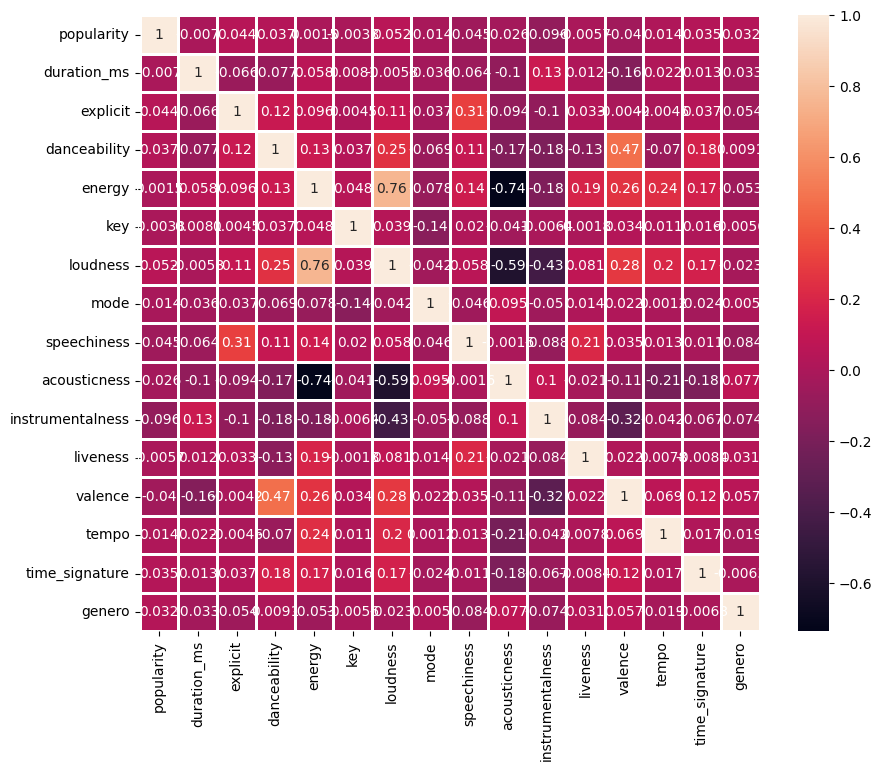

In [92]:
corr = df_modelo.drop('track_name', axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot= True, linewidths=1)
plt.savefig('Matriz Spotify.png')

In [93]:
df_modelo2 = df_modelo.drop('track_name', axis=1)

VARIABLES PARA ANALISIS BIVARIADO:

- LOUDNESS & ENERGY
- VALENCE & DANCEABILITY
- EXPLICIT & SPEACHINESS
- DANCEABILITY & LOUDNESS

ENERGY & LOUDNESS

In [94]:
print(df_modelo2.columns)
print(df_modelo2.dtypes)

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero'],
      dtype='object')
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genero                int64
dtype: object


In [95]:
df_modelo2['loudness']

0         -6.746
1        -17.235
2         -9.734
3        -18.515
4         -9.681
           ...  
113995   -16.393
113996   -18.318
113997   -10.895
113998   -10.889
113999   -10.204
Name: loudness, Length: 113842, dtype: float64

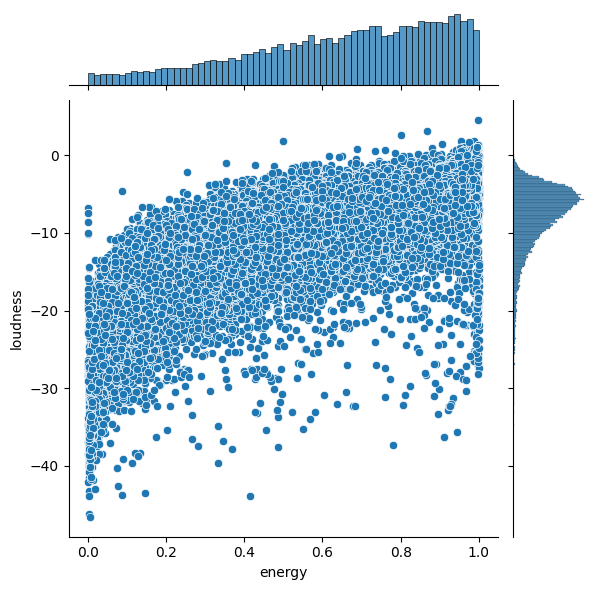

In [96]:
sns.jointplot(x='energy',y='loudness',data=df_modelo2,kind='scatter')

***Entre la relacion de energia y volumen, podemos ver que las pistas con mas volumen son las mas energicas, y con menos volumen, las mas tristes de meditacion o relajantes. VOLUMEN BAJO = - ENERGIA ; VOLUMEN ALTO = + ENERGIA***

VALENCE & DANCEABILITY

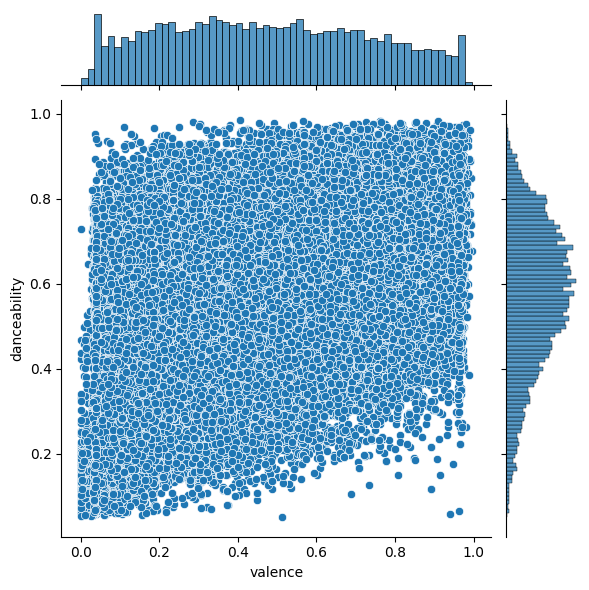

In [97]:
sns.jointplot(x='valence',y='danceability',data=df_modelo2,kind='scatter')

***Podemos ver que mientras mas positividad tiene una pista, mas bailable es, de lo contrario cuando menos positiva es, menos bailable es. Si bien es algo obvio, pero interpreta una tendencia para que las personas elijan pistas mas positivas por ende los artistan tiendan tambien a componer una gran variedad de canciones alegres o positivas. Sin embargo hay una gran diversidad de generos y pistas con gran variedad de positividad y bailabilidad.***

EXPLICIT & SPEACHENESS

<Axes: xlabel='explicit', ylabel='speechiness'>

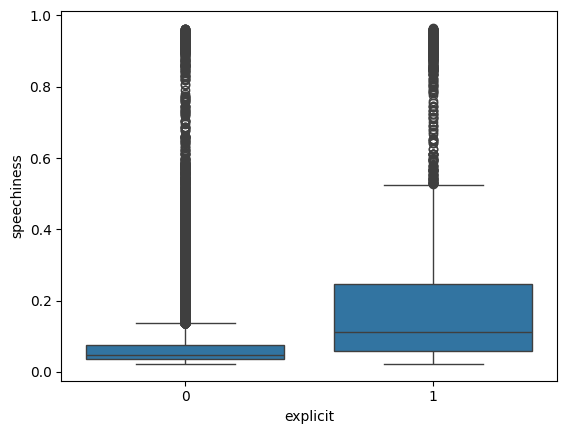

In [98]:
sns.boxplot(x='explicit',y='speechiness',data=df_modelo2)

***Finalmente podemos ver que las canciones mas habladas tienden a ser las que tienen mas contenido explicito, mientras que las canciones con menos palabras, son las menos explicitas. Será una tendendia a consumir mas cancionex explicitas?***

DANCEABILITY & LOUDNESS

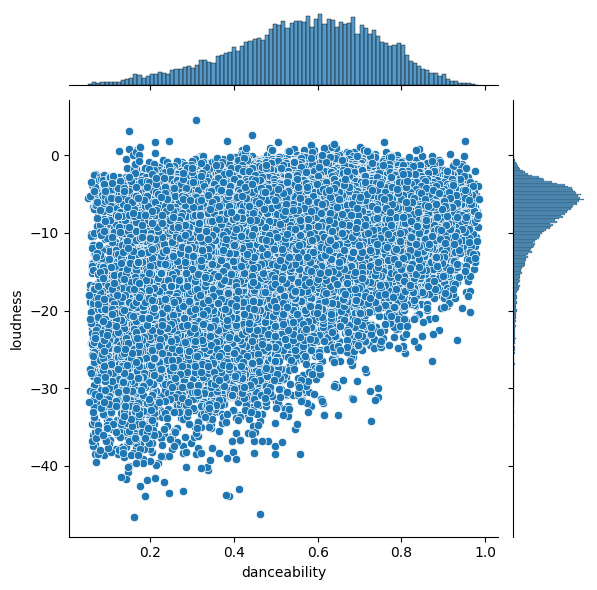

In [99]:
sns.jointplot(x='danceability',y='loudness',data=df_modelo2,kind='scatter')

***La tendencia entre estas dos variables se puede ver de manera facil, entendemos que mientras menos sonido tiene una pista, menos bailable es, de por si las pistas que tienen un tono y volumen mas fuerte, son las mas elegidas para bailar.***

VARIABLES DE ANALISIS BIVARIADO DE INTERES PERSONAL:
- energy & valence
- energy & tempo
- liveness & popularity

ENERGY & VALENCE

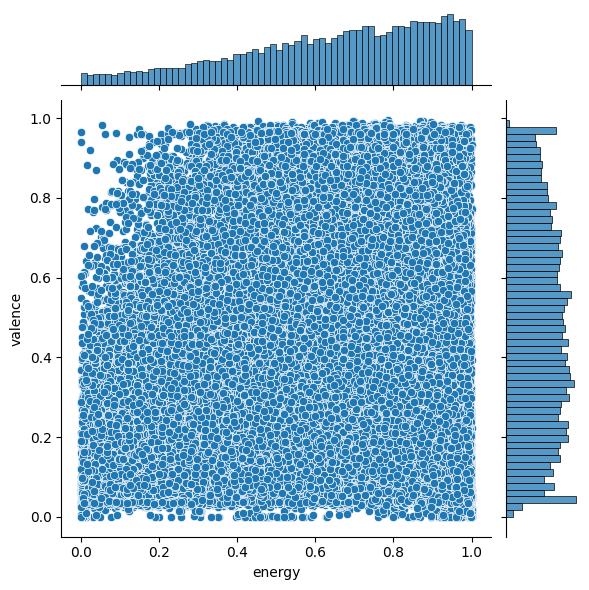

In [100]:
sns.jointplot(x='energy',y='valence',data=df_modelo2,kind='scatter')

***Por una cuestion personal queria ver esta interpretacion grafica, entre la energia y la positividad, la diferencia se ve entre en la esquina superior izquierda y derecha, mientras mas energica es una cancion, mas positiva es. AUNQUE... energy tambien puede hacer referencia a una pista de heavy o death methal, que si bien son muy energicas pero por lo general no transmiten mucha positividad. Asi como muchas otras pistas. Por eso aunque podemos ver esa diferencia, en el centro econtramos una gran cantidad de pistas diversas, debido a la distribucion uniforme de generos.***

ENERGY & TEMPO

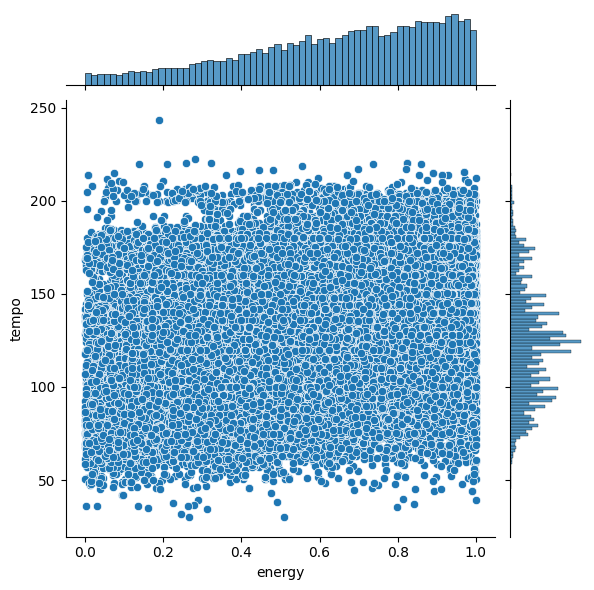

In [101]:
sns.jointplot(x='energy',y='tempo',data=df_modelo2,kind='scatter')

In [102]:
df_modelo2[df_modelo2['tempo'] == 0.0]

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero


***Gracias a seguir las buenas practicas en el análisis, se pudo detectar que las pistas con un valor de tempo 0.0 son valores anómalos en la muestra. Lo podemos deducir ya que pueden existir algunas pistas con tempo 0.0, pero en la mayoria de nuestros casos, las pistas con tempo 0.0 corresponden a temas que son muy bailables o energicos.
Si bien existe la forma de poder calcular el tempo a travez de la duracion total de una pista, se necesita otra variable como la cantidad de pulsaciones, y como esa variable no la tenemos, para evitar datos erroneos que quizas arruinen nuestra muestra, los vamos a quitar del dataset para el modelo y vamos a correr todos los graficos nuevamente.***

***LUEGO DEL ANALISIS BIVARIADO HACER UN PCA SIN ELIMINAR COLUMNAS, SOLO REDUCIR LA DIMENSIONALIDAD Y PROBAR EL MODELO PARA RESPUES PODES TESTEARLO.***

In [103]:
df_modelo2.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero'],
      dtype='object')

Variables interesantes:
- popularity
- explicit
- danceability
- energy
- loudness
- speechiness
- valence


## PCA ANTES DE COMENZAR CON EL MODELADO

In [104]:
df_modelo2.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero'],
      dtype='object')

In [105]:
df_modelo2.head(4)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.132,0.143,181.740,3,0


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [107]:
vars = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero']
x = df_modelo2.loc[:, vars].values
x = StandardScaler().fit_transform(x)

In [108]:
x.shape

(113842, 16)

In [109]:
#REDUCIMOS LA DIMENSIONALIDAD A SOLO 2 COMPONENTES
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [110]:
principal_components

array([[-0.77203339, -0.70242586],
       [ 3.26022314, -1.2285934 ],
       [ 1.37518315,  0.24323321],
       ...,
       [ 1.19377357, -1.60547094],
       [ 0.53924051, -0.27172255],
       [ 1.00423357, -1.51339133]])

In [111]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])

In [112]:
principal_df

,PC1,PC2
0,-0.772033,-0.702426
1,3.260223,-1.228593
2,1.375183,0.243233
3,3.805883,0.521098
4,0.933049,-0.182294
...,...,...
113837,3.549296,1.911911
113838,5.078694,1.407997
113839,1.193774,-1.605471
113840,0.539241,-0.271723


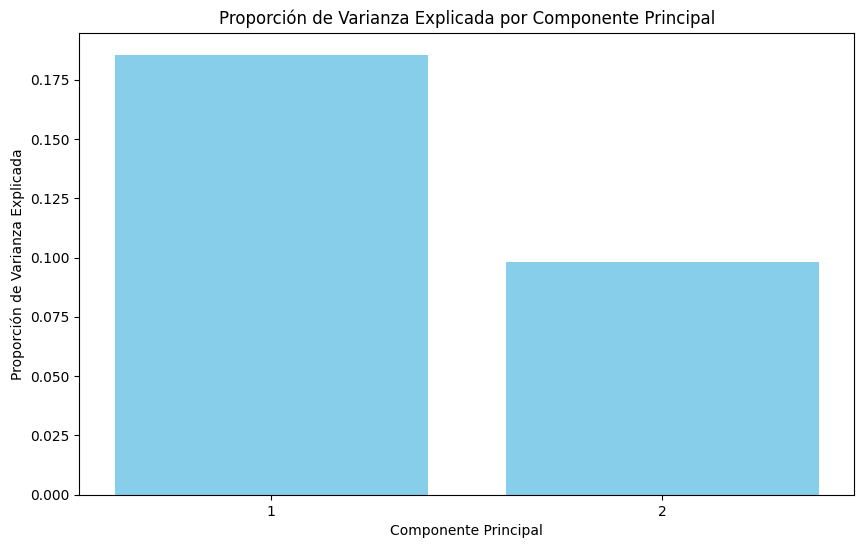

In [113]:
explained_variance_ratio = pca.explained_variance_ratio_

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada por Componente Principal')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

***Como podemos ver reducimos la dimensionalidad con PCA, segun el ultimo grafico lo mejor seria conservar dos o tres componentes, pero conservamos 10, con el objeto de estudiar los resultados del algoritmo venidero.***

In [114]:
X = principal_df.iloc[::].values

In [115]:
X.shape

(113842, 2)

## K-Means Modelo

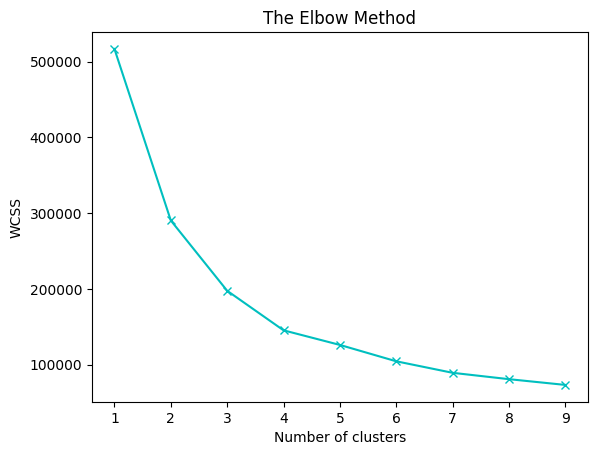

In [116]:
#METODO DE CODO
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 10), wcss, "cx-")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***En este grafico con 10 distancias obtservamos que la disminucion de las mismas entre clusters es a partir del numero 4.***

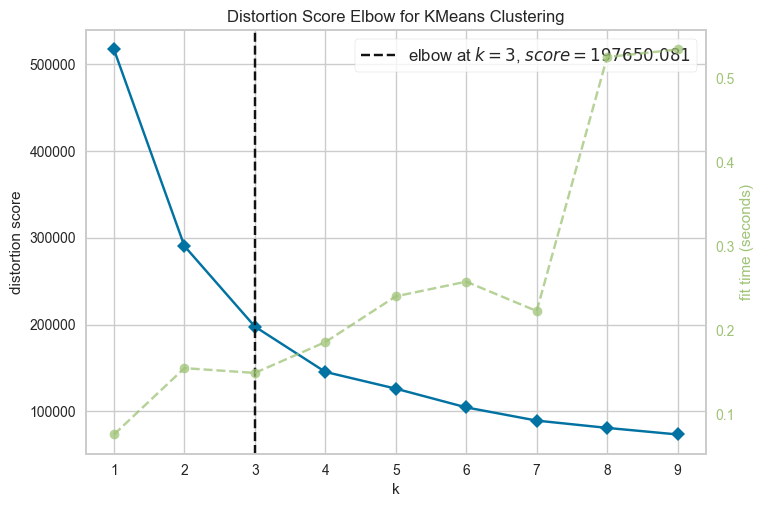

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
#METODO DE CODO CON KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Instanciar el modelo de clustering y el visualizador
km = KMeans(random_state=42, init = 'k-means++')
visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X)        # Ajustar los datos al visualizador
visualizer.show()   

***Sin embargo este grafico parece estar de acuerdo con que el valor de k es igual a 3 para un score de 197585.257.***

In [118]:
# Creando Modelo con 4 Clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

In [119]:
X

array([[-0.77203339, -0.70242586],
       [ 3.26022314, -1.2285934 ],
       [ 1.37518315,  0.24323321],
       ...,
       [ 1.19377357, -1.60547094],
       [ 0.53924051, -0.27172255],
       [ 1.00423357, -1.51339133]])

In [120]:
y_kmeans

array([1, 2, 3, ..., 3, 3, 3])

***Probamos con 4 clusters***

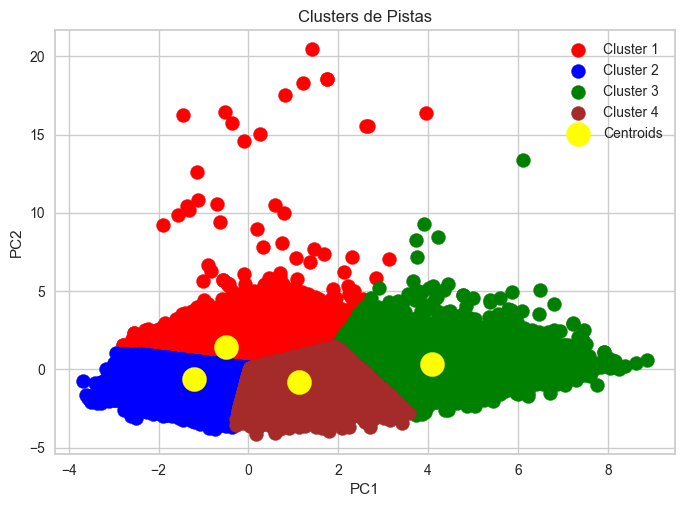

In [121]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters de Pistas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

***Desde el comienzo del análisis se podia observar que si bien habia distribuciones en funcion de variables unicas y dobles, lo que mas predominaba era la cantidad de pistas con distribuciones y caracteristicas similares. Por eso vemos en la agrupacion de Clusters que tenemos la muestra generalizada en el centro de la grafica, y algunos pocos puntos dispersos.***

In [122]:
principal_df

,PC1,PC2
0,-0.772033,-0.702426
1,3.260223,-1.228593
2,1.375183,0.243233
3,3.805883,0.521098
4,0.933049,-0.182294
...,...,...
113837,3.549296,1.911911
113838,5.078694,1.407997
113839,1.193774,-1.605471
113840,0.539241,-0.271723


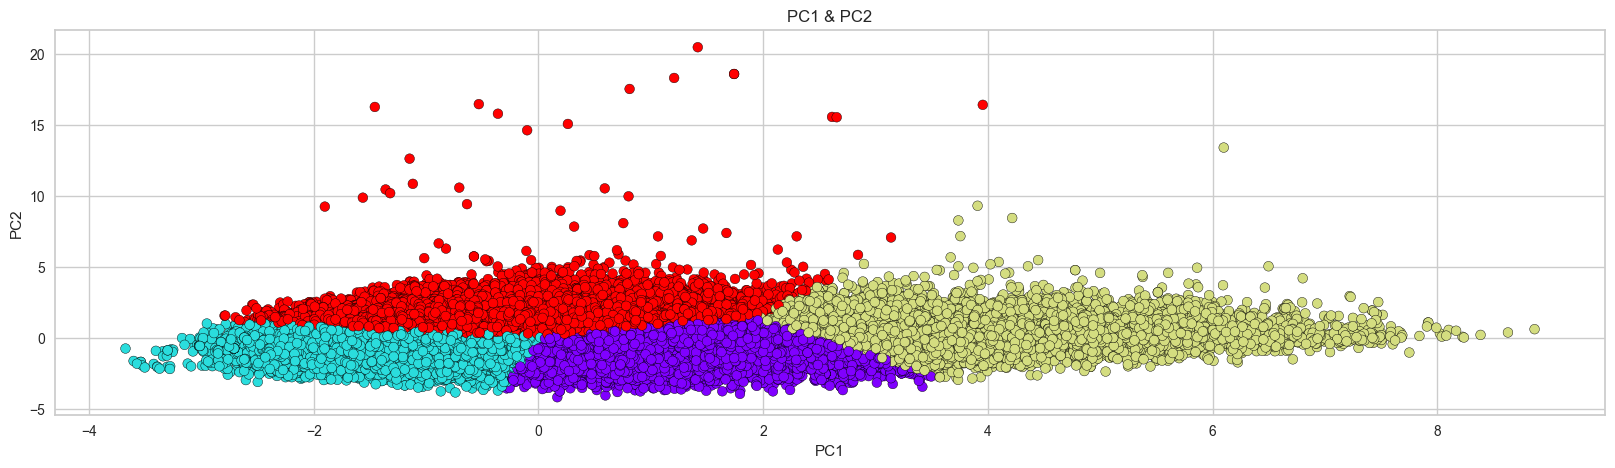

In [123]:
#VISUALIZACION GRAFICA DE LOS CLUSTERS 2
model = KMeans(n_clusters = 4, max_iter = 1000)
model.fit(X)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'PC1', y = 'PC2', c = labels, cmap = 'rainbow', data = principal_df, edgecolor = 'black');
plt.title('PC1 & PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

***Una grafica scatter mas entedible y agradable visualmente.***

In [124]:
from sklearn.metrics import davies_bouldin_score
labels = y_kmeans
davies_bouldin_score(X, labels)

0.8298752299429519

***Hasta ahora con estas graficas y resultado final, podemos ver que tenemos muchas superpociciones, por ende la cercania de algunos centroides es mucha. Vamos a testear el modelo para luego hacer los ajustes.***

In [125]:
df_modelo.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
count,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,33.233367,2.281087e+05,0.085619,0.567582,0.642098,5.309209,-8.239872,0.637489,0.084769,0.314656,0.155369,0.213221,0.474720,122.316149,3.909418,56.445099
std,22.316078,1.063062e+05,0.279801,0.172380,0.250794,3.559419,4.993665,0.480727,0.105759,0.332338,0.308893,0.189929,0.258841,29.653539,0.407887,32.891175
min,0.000000,1.580000e+04,0.000000,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000,0.000000
25%,17.000000,1.741985e+05,0.000000,0.456000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.429500,4.000000,28.000000
50%,34.000000,2.130000e+05,0.000000,0.580000,0.685000,5.000000,-6.998000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000,56.000000
75%,50.000000,2.615830e+05,0.000000,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047700,0.273000,0.683000,140.077750,4.000000,85.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


In [126]:
df_modelo2.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
count,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,33.233367,2.281087e+05,0.085619,0.567582,0.642098,5.309209,-8.239872,0.637489,0.084769,0.314656,0.155369,0.213221,0.474720,122.316149,3.909418,56.445099
std,22.316078,1.063062e+05,0.279801,0.172380,0.250794,3.559419,4.993665,0.480727,0.105759,0.332338,0.308893,0.189929,0.258841,29.653539,0.407887,32.891175
min,0.000000,1.580000e+04,0.000000,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000,0.000000
25%,17.000000,1.741985e+05,0.000000,0.456000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.429500,4.000000,28.000000
50%,34.000000,2.130000e+05,0.000000,0.580000,0.685000,5.000000,-6.998000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000,56.000000
75%,50.000000,2.615830e+05,0.000000,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047700,0.273000,0.683000,140.077750,4.000000,85.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


In [127]:
principal_df.head(2)

,PC1,PC2
0,-0.772033,-0.702426
1,3.260223,-1.228593


In [128]:
principal_df.shape

(113842, 2)

In [129]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=4, init='k-means++', n_init=10).fit(principal_df)

In [130]:
# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(principal_df)

In [131]:
# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

In [132]:
predictions_df['cluster'].unique()

array([0, 1, 3, 2])

In [133]:
predictions_df.shape

(113842, 1)

In [134]:
predictions_df.head(5)

,cluster
0,0
1,1
2,3
3,1
4,3


In [135]:
predictions_df = predictions_df.reset_index()

In [136]:
# Attach cluster predictions to original data frame
spotify_pred = df_modelo.copy()

In [137]:
spotify_pred.head(5)

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [138]:
spotify_pred.shape

(113842, 17)

In [139]:
spotify_pred = spotify_pred.reset_index()

In [140]:
spotify_pred.head(2)

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,0,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,0
1,1,Ghost - Acoustic,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,0


In [141]:
spotify_pred = pd.merge(spotify_pred, predictions_df)

In [142]:
spotify_pred['cluster'].unique()

array([0, 1, 3, 2])

In [143]:
spotify_pred[spotify_pred['popularity'] >= 70].sort_values(by='popularity', ascending= False)

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
19998,20001,Unholy (feat. Kim Petras),100,156943,0,0.714,0.472,2,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,20,0
81036,81051,Unholy (feat. Kim Petras),100,156943,0,0.714,0.472,2,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,80,0
51657,51664,"Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,0,0.621,0.782,2,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,4,51,0
68290,68303,La Bachata,98,162637,0,0.835,0.679,7,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,68,0
88395,88410,La Bachata,98,162637,0,0.835,0.679,7,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92153,92168,You Never Can Tell,70,161906,0,0.525,0.852,7,-9.519,1,0.2220,0.731000,0.000051,0.2180,0.884,157.404,4,92,0
81644,81659,Animals,70,231013,0,0.279,0.742,4,-6.460,0,0.0898,0.000185,0.000000,0.5930,0.328,189.868,4,80,0
56222,56229,overwhelmed,70,159293,0,0.804,0.323,0,-11.127,0,0.3050,0.308000,0.000000,0.1500,0.456,87.019,4,57,2
21056,21059,She Doesn't Mind,70,227786,0,0.718,0.776,7,-5.208,0,0.0693,0.000624,0.000005,0.2070,0.622,120.015,4,21,0


## TEST DEL MODELO

In [144]:
#Borramos algunos duplicados [TAREA QUE TENDRIA QUE HABERCE REALIZADO ANTES]. Proxima correccion.
spotify_pred = spotify_pred.drop_duplicates(subset=['track_name'], keep='last')

In [145]:
spotify_pred[spotify_pred['track_name'] == 'Presión']

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
3982,3982,Presión,47,238346,0,0.414,0.938,10,-4.592,0,0.0684,0.0602,0.000001,0.11,0.643,99.014,4,3,2


In [146]:
cluster_num = spotify_pred[spotify_pred.track_name =='La Bachata'].cluster.item()

In [147]:
cluster_num

0

In [148]:
spotify_pred[spotify_pred.genero == 89]

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
88987,89002,AMOR DE MI VIDA,7,189613,0,0.735,0.674,6,-5.629,0,0.1240,0.1800,0.000000,0.108,0.561,171.883,4,89,0
88998,89013,JAMAICA,6,224240,0,0.520,0.542,1,-7.404,0,0.1550,0.0383,0.000000,0.371,0.669,81.131,4,89,0
88999,89014,TENGO FE,4,146426,0,0.757,0.571,7,-4.547,0,0.0906,0.2640,0.000009,0.313,0.538,159.933,4,89,0
89002,89017,SI TÚ SUPIERAS,6,196373,0,0.673,0.664,4,-5.382,0,0.1770,0.3760,0.000000,0.111,0.586,174.972,4,89,0
89006,89021,FRESH KERIAS,2,272800,0,0.741,0.582,8,-4.445,1,0.2810,0.2910,0.000101,0.152,0.713,186.096,4,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89978,89993,Amémonos a Escondidas,39,251226,0,0.761,0.909,10,-2.928,0,0.0704,0.1500,0.000000,0.215,0.555,99.999,4,89,0
89979,89994,"Soltero (feat. Mati, Fran C, Kevin Martes 13 &...",39,342517,1,0.502,0.601,0,-10.573,1,0.3100,0.0137,0.000000,0.197,0.527,139.819,5,89,0
89981,89996,Me Encantas,38,248189,0,0.809,0.656,4,-7.134,1,0.2460,0.0832,0.000000,0.100,0.819,171.924,4,89,0
89982,89997,Salimos a Cazarte - Remix,39,363573,1,0.748,0.692,11,-6.613,0,0.3700,0.2180,0.000000,0.209,0.622,170.097,4,89,0


In [149]:
spotify_pred[spotify_pred.cluster == cluster_num]

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
14,14,Hold On - Remix,56,188133,0,0.755,0.780,2,-6.084,1,0.0327,0.1240,0.000028,0.1210,0.38700,120.004,4,0,0
128,128,Come On Get Higher,71,215173,0,0.672,0.623,9,-5.699,1,0.0297,0.2410,0.000000,0.0848,0.61700,92.018,4,0,0
133,133,Sleep All Day,22,296843,0,0.616,0.810,2,-6.510,1,0.0668,0.3690,0.000000,0.1070,0.79000,97.994,4,0,0
139,139,No Stopping Us,19,198855,0,0.646,0.836,1,-6.203,1,0.0327,0.3010,0.000032,0.2900,0.72700,105.991,4,0,0
140,140,I'll Do Anything,24,191889,0,0.570,0.711,9,-4.155,1,0.0703,0.1190,0.000000,0.3520,0.64800,163.117,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113594,113751,Lord Send Revival - Acoustic,41,293160,0,0.248,0.294,11,-8.327,1,0.0295,0.7640,0.000000,0.1080,0.12600,149.464,3,113,0
113603,113760,Stand In Awe,49,330422,0,0.300,0.189,7,-11.753,1,0.0303,0.9350,0.000000,0.1140,0.26400,96.731,3,113,0
113615,113772,Fresh Wind / What A Beautiful Name - Live,43,611770,0,0.308,0.613,0,-7.665,1,0.0427,0.0167,0.000000,0.2170,0.19000,127.080,4,113,0
113633,113790,"Para Reiki: Gotas de Agua, Pt. 01",23,104025,0,0.173,0.895,1,-33.335,1,0.0431,0.1520,0.992000,0.9200,0.00312,94.917,3,113,0


In [150]:
spotify_pred.dtypes

index                 int64
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genero                int64
cluster               int32
dtype: object

In [151]:
spotify_pred.loc[(spotify_pred['genero'] == 89) & (spotify_pred['cluster'] == 0) & (spotify_pred['popularity'] >= 70)].head(10).sort_values(by='popularity', ascending=False)

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
89390,89405,Tití Me Preguntó,97,243716,0,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4,89,0
89392,89407,Me Porto Bonito,97,178567,1,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,4,89,0
89388,89403,Ojitos Lindos,94,258298,0,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4,89,0
89394,89409,PROVENZA,93,210200,0,0.870,0.516,1,-8.006,1,0.0541,0.6560,0.008230,0.1100,0.530,111.005,4,89,0
89387,89402,Yo Voy (feat. Daddy Yankee),84,232019,0,0.808,0.697,10,-5.899,1,0.2410,0.0410,0.000000,0.0546,0.554,95.060,4,89,0
89389,89404,Nostálgico,80,209883,1,0.734,0.846,9,-3.425,0,0.0489,0.1660,0.000002,0.2350,0.604,98.026,4,89,0
89386,89401,MIA (feat. Drake),79,210367,0,0.817,0.539,6,-6.349,0,0.0621,0.0141,0.000496,0.0990,0.158,97.062,4,89,0
89285,89300,Shower,78,206166,0,0.699,0.529,2,-7.548,1,0.0487,0.0317,0.000036,0.2850,0.121,119.987,4,89,0
89391,89406,X,74,172854,0,0.594,0.749,9,-5.298,0,0.0560,0.0338,0.001060,0.3000,0.694,179.968,4,89,0
89385,89400,Hawái - Remix,72,200481,0,0.766,0.788,6,-3.128,0,0.3120,0.1050,0.000006,0.1420,0.609,179.984,4,89,0


FUNCION LISTA REPRODUCCION

In [164]:
def lista_reproduccion(cancion, spotify_pred):
    cluster_num = spotify_pred[spotify_pred.track_name == cancion].cluster.item()
    genero_num = spotify_pred[spotify_pred.track_name == cancion].genero.item()
    playlist = spotify_pred.loc[(spotify_pred['genero'] == genero_num) & (spotify_pred['cluster'] == cluster_num) & (spotify_pred['popularity'] > 60)].head(10).sort_values(by= 'popularity', ascending=False)
    return playlist

In [153]:
genero_num = spotify_pred[spotify_pred.track_name == 'Yendo De La Cama Al Living'].genero.item()

In [165]:
cancion = 'In Da Club'

In [166]:
playlist = lista_reproduccion(cancion, spotify_pred)

In [167]:
# PISTA = "IN DA CLUB"
playlist

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
51451,51458,Super Freaky Girl,92,170977,1,0.950,0.891,2,-2.653,1,0.2410,0.06450,0.000018,0.3090,0.912,133.010,4,51,2
51270,51277,Till I Collapse,86,297786,1,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.100,171.447,4,51,2
51006,51013,Cold Hours,74,206117,0,0.737,0.613,1,-7.304,0,0.3580,0.31600,0.000001,0.3430,0.493,170.140,4,51,2
51125,51132,"Two Two Two (From ""Kaathuvaakula Rendu Kaadhal"")",66,176345,0,0.821,0.690,1,-4.981,1,0.1870,0.02020,0.003980,0.1990,0.648,140.171,4,51,2
51278,51285,She Move It Like,65,181764,0,0.832,0.477,0,-6.949,1,0.0481,0.00725,0.000065,0.2050,0.844,101.997,4,51,2
51164,51171,Snake,64,281088,0,0.707,0.625,4,-7.638,0,0.1450,0.70900,0.000003,0.2980,0.477,123.028,4,51,2
51263,51270,Lethal,63,151128,0,0.781,0.768,4,-5.525,0,0.1830,0.74400,0.000006,0.1100,0.816,143.156,4,51,2
51275,51282,Satisfy,62,280464,0,0.683,0.800,5,-4.874,0,0.1680,0.43100,0.000000,0.3570,0.748,172.024,4,51,2
51288,51295,Kannuladha - The Kiss of Love,62,206253,0,0.592,0.548,8,-6.483,0,0.0282,0.43600,0.000016,0.2960,0.583,109.946,4,51,2
51347,51354,All Black,61,218145,0,0.813,0.734,10,-5.464,0,0.0577,0.07200,0.000000,0.1180,0.652,107.967,4,51,2


***A modo de conclusión final, vemos que la falta de limpieza e ingeniería de variables en el comienzo, dio como resultado que la muestra tenga muchas superposiciones, por ende las recomendaciones que entrega, incluso creando la funcion para ordenar por genero y popularidad, no son lo esperado por lo menos a nivel de preferencia. Si bien este ultimo punto es discutible, porque quizas las nuevas pistas recomendadas pueden otorgar un "sentimiento" similar a la pista ingresada.***